In [22]:
import os
import numpy as np
import pandas as pd
from math import sqrt
from matplotlib import pyplot
from scipy.stats import pearsonr
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import KFold
from pandas.plotting import scatter_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

house_data = pd.read_csv("house_data_complete.csv")

In [23]:
data = house_data.drop(["id","date","sqft_above","zipcode","lat","long","sqft_living15","sqft_lot15"] , axis = 1)
print(data.shape)

data = data.drop(data[data.bedrooms > 20].index)
data = data.drop(data[data.sqft_living > 5000].index)
data = data.drop(data[data.bathrooms > 7].index)
data = data.drop(data[data.sqft_lot > 100000].index) #15

(21613, 13)


In [24]:
Data_array = data.to_numpy()

In [25]:
def plotData(x, y, ylabel, xlabel):

    fig = pyplot.figure()
    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel(ylabel)
    pyplot.xlabel(xlabel)

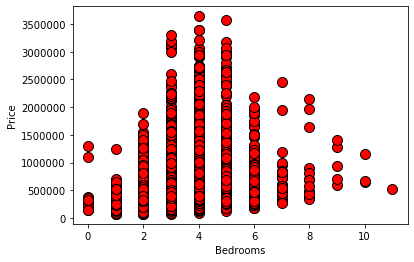

In [30]:
Prices = Data_array[:,0]
Bedrooms = Data_array[:,1]
plotData(Bedrooms,Prices,'Price','Bedrooms')

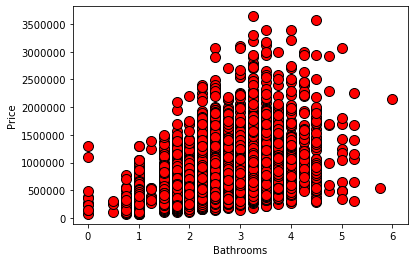

In [26]:
Prices = Data_array[:,0]
Bathrooms = Data_array[:,2]
plotData(Bathrooms,Prices,'Price','Bathrooms')

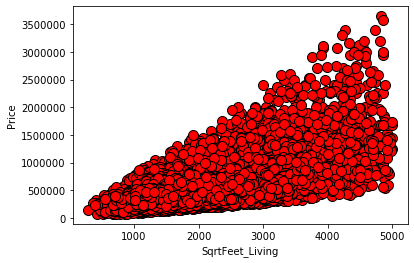

In [27]:
Prices = Data_array[:,0]
Feets = Data_array[:,3]
plotData(Feets,Prices,'Price','SqrtFeet_Living')

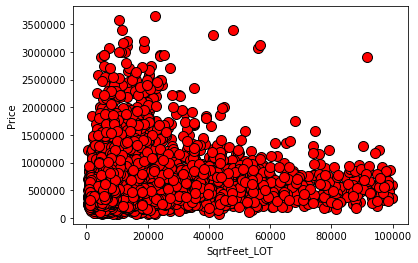

In [31]:
Prices = Data_array[:,0]
SqrtFeet_LOT = Data_array[:,4]
plotData(SqrtFeet_LOT,Prices,'Price','SqrtFeet_LOT')

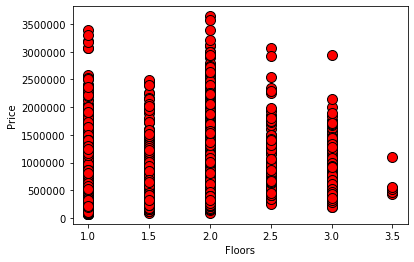

In [32]:
Prices = Data_array[:,0]
Floors = Data_array[:,5]
plotData(Floors,Prices,'Price','Floors')

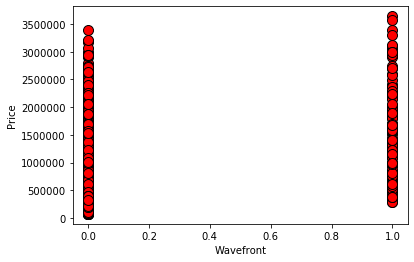

In [33]:
Prices = Data_array[:,0]
Wavefront = Data_array[:,6]
plotData(Wavefront,Prices,'Price','Wavefront')

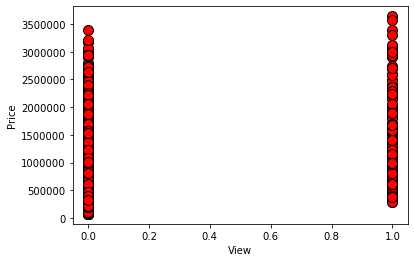

In [34]:
Prices = Data_array[:,0]
View = Data_array[:,7]
plotData(Wavefront,Prices,'Price','View')

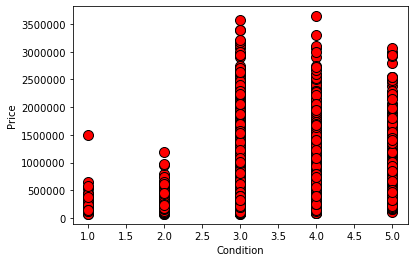

In [35]:
Prices = Data_array[:,0]
Condition = Data_array[:,8]
plotData(Condition,Prices,'Price','Condition')


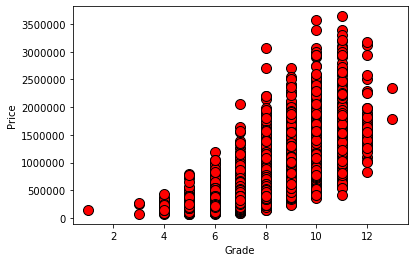

In [36]:
Prices = Data_array[:,0]
Grade = Data_array[:,9]
plotData(Grade,Prices,'Price','Grade')

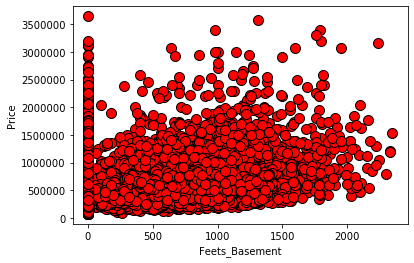

In [37]:
Prices = Data_array[:,0]
Feets_Basement = Data_array[:,10]
plotData(Feets_Basement,Prices,'Price','Feets_Basement')

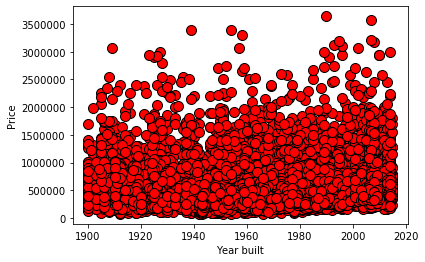

In [38]:
Prices = Data_array[:,0]
Year = Data_array[:,11]
plotData(Year,Prices,'Price','Year built')

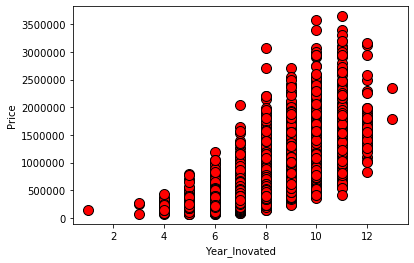

In [39]:
Prices = Data_array[:,0]
Year_Inov = Data_array[:,12]
plotData(Grade,Prices,'Price','Year_Inovated')

In [40]:
X = Data_array[:,1:]
Y = Data_array[:,0]
print(X.shape)
print(Y.shape)


(20964, 12)
(20964,)


In [51]:
X_train, X_check, Y_train, Y_check = train_test_split(X, Y, test_size = 0.3, shuffle = True) 

X_validation , X_test, Y_validation, Y_test = train_test_split(X_check, Y_check, test_size = 0.3, shuffle = True)

print(X_train.shape)
print(Y_train.shape)
print(X_validation.shape)
print(Y_validation.shape)
print(X_test.shape)
print(Y_test.shape)



(14674, 12)
(14674,)
(4403, 12)
(4403,)
(1887, 12)
(1887,)


In [42]:
def featureNormalize(X):
    
    X_norm = X.copy()
    mu = np.zeros(X.shape[0])
    sigma = np.zeros(X.shape[0])
    
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

In [43]:
X_train_norm,mu,sigma = featureNormalize(X_train)

X_test_norm = (X_test - mu)/sigma
X_validation_norm = (X_validation - mu)/sigma


In [45]:
Y_train_size = Y_train.size
Y_validation_size = Y_validation.size
Y_test_size = Y_test.size


X_train_norm = np.concatenate( [np.ones((Y_train_size, 1)), X_train_norm], axis=1 )
X_test_norm = np.concatenate( [np.ones((Y_test_size, 1)), X_test_norm], axis=1 )
X_validation_norm = np.concatenate( [np.ones((Y_validation_size, 1)), X_validation_norm], axis=1 )

print(Y_train.shape)
print(X_train_norm.shape)
print(X_train_norm.shape)


(14674,)
(14674, 14)
(14674, 14)


In [46]:
def computeCostMulti(X, y, theta):
    
    m = y.shape[0]
    J = 0

    J= (1/(2*m)) * np.dot(np.transpose(np.dot(X,theta)-y),np.dot(X,theta)-y)

    return J


In [47]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
   
    m = y.shape[0]
    theta = theta.copy()
    J_history = []
    X = np.array(X)

    for i in range(num_iters):
        
        hypothesis= np.dot(X,theta)
        theta=theta-((alpha/m)*(np.dot(hypothesis-y,X)))

        J_history.append(computeCostMulti(X, y, theta))
        
    return theta, J_history

[ 5.22906318e+05 -3.05459567e+03 -3.09736447e+03  1.66734024e+03
  5.78114363e+03  4.56899224e+03 -9.97314485e+02 -7.72897471e+01
  1.38641399e+03  3.17090660e+03  1.89721699e+03 -4.68355683e+03
 -8.74731790e+02]


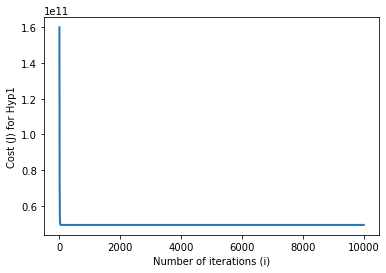

In [55]:
α_hyp1 = 0.1

iterations_hyp1 = 10000
theta_hyp1 = np.zeros(13)

theta_hyp1, J_history_hyp1 = gradientDescentMulti(X_train_norm[:,1:], Y_train, theta_hyp1, α_hyp1, iterations_hyp1)

pyplot.plot(np.arange(len(J_history_hyp1)), J_history_hyp1, lw=2)
pyplot.xlabel('Number of iterations (i)')
pyplot.ylabel('Cost (J) for Hyp1')

print(str(theta_hyp1))

In [59]:
# Hyp2 = [X(0)*X(4)*X(7)*X(8)]*θ(0) + [X(11)*X(5)*X(6)]*θ(1) + [X(1)*X(2)*X(9)*X(10)]*θ(2) + [X(3)]*θ(3)
print(X)
def hypFn_2(X):
    X_new = np.zeros((X.shape[0],4))
    
    X_new[:,0] = X[:,0] * X[:,4] * X[:,7] * X[:,8]
    X_new[:,1] = X[:,11] * X[:,5] * X[:,6]
    X_new[:,2] = X[:,1] * X[:,2] * X[:,9] * X[:,10]
    X_new[:,3] = X[:,3]

    return X_new

[[3.000e+00 1.000e+00 1.180e+03 ... 0.000e+00 1.955e+03 0.000e+00]
 [3.000e+00 2.250e+00 2.570e+03 ... 4.000e+02 1.951e+03 1.991e+03]
 [2.000e+00 1.000e+00 7.700e+02 ... 0.000e+00 1.933e+03 0.000e+00]
 ...
 [2.000e+00 7.500e-01 1.020e+03 ... 0.000e+00 2.009e+03 0.000e+00]
 [3.000e+00 2.500e+00 1.600e+03 ... 0.000e+00 2.004e+03 0.000e+00]
 [2.000e+00 7.500e-01 1.020e+03 ... 0.000e+00 2.008e+03 0.000e+00]]


In [61]:
X_train_norm_hyp2 = hypFn_2(X_train)
X_validation_hyp2 = hypFn_2(X_validation)
X_test_hyp2 = hypFn_2(X_test)

print(X_test_hyp2.shape)

(1887, 4)


In [62]:
X_train_norm_hyp2 ,mu_hyp2,sigma_hyp2 = featureNormalize(X_train_norm_hyp2)
X_test_norm_hyp2 = (X_test_hyp2 - mu_hyp2)/sigma_hyp2
X_validation_norm_hyp2 = (X_validation_hyp2 - mu_hyp2)/sigma_hyp2
print(X_train_norm_hyp2.shape)

X_train_norm_hyp2 = np.concatenate( [np.ones((Y_train_size, 1)), X_train_norm_hyp2], axis=1 )
X_validation_norm_hyp2 = np.concatenate( [np.ones((Y_validation_size, 1)), X_validation_norm_hyp2], axis=1 )
X_test_norm_hyp2 = np.concatenate( [np.ones((Y_test_size, 1)), X_test_norm_hyp2], axis=1 )

print(X_train_norm_hyp2.shape)
print(Y_train.shape)
print(X_train_norm_hyp2.shape)

(14674, 4)
(14674, 5)
(14674,)
(14674, 5)


[522906.31831811 142985.59636003  24448.89179303  98903.2137399
  19065.55265492]


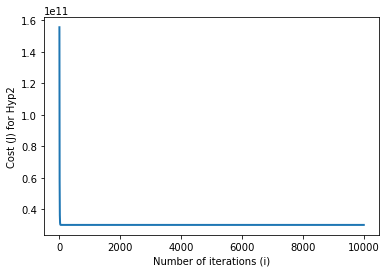

In [63]:
α_hyp2 = 0.1

iterations_hyp2 = 10000
theta_hyp2 = np.zeros(5)

theta_hyp2, J_history_hyp2 = gradientDescentMulti(X_train_norm_hyp2, Y_train, theta_hyp2, α_hyp2, iterations_hyp2)

pyplot.plot(np.arange(len(J_history_hyp2)), J_history_hyp2, lw=2)
pyplot.xlabel('Number of iterations (i)')
pyplot.ylabel('Cost (J) for Hyp2')

print(str(theta_hyp2))

In [64]:
# Hyp3 = [X(0)*X(1)]*θ(0) + [X(3)*X(2]]*θ(1) + [X(4)*X(5)]*θ(2) + [X(6)*X(7)]*θ(3) + [X(8)*X(9)]*θ(4) + [X(10)*X(11)]*θ(5)
print(X)
print(X.shape)
def hypFn_3(X):
    
    X_new = np.zeros((X.shape[0],6))
    
    X_new[:,0] = X[:,0] * X[:,1] 
    X_new[:,1] = X[:,2] * X[:,3] 
    X_new[:,2] = X[:,4] * X[:,5]
    X_new[:,3] = X[:,6] * X[:,7]
    X_new[:,4] = X[:,8] * X[:,9]
    X_new[:,5] = X[:,10] * X[:,11]
    
    return X_new

[[3.000e+00 1.000e+00 1.180e+03 ... 0.000e+00 1.955e+03 0.000e+00]
 [3.000e+00 2.250e+00 2.570e+03 ... 4.000e+02 1.951e+03 1.991e+03]
 [2.000e+00 1.000e+00 7.700e+02 ... 0.000e+00 1.933e+03 0.000e+00]
 ...
 [2.000e+00 7.500e-01 1.020e+03 ... 0.000e+00 2.009e+03 0.000e+00]
 [3.000e+00 2.500e+00 1.600e+03 ... 0.000e+00 2.004e+03 0.000e+00]
 [2.000e+00 7.500e-01 1.020e+03 ... 0.000e+00 2.008e+03 0.000e+00]]
(20964, 12)


In [65]:
X_train_norm_hyp3 = hypFn_3(X_train)

X_validation_hyp3 = hypFn_3(X_validation)

X_test_hyp3 = hypFn_3(X_test)

print(X_train_norm_hyp3.shape)

(14674, 6)


In [66]:
X_train_norm_hyp3 ,mu_hyp3,sigma_hyp3 = featureNormalize(X_train_norm_hyp3)
X_test_norm_hyp3 = (X_test_hyp3 - mu_hyp3)/sigma_hyp3
X_validation_norm_hyp3 = (X_validation_hyp3 - mu_hyp3)/sigma_hyp3
print(X_train_norm_hyp3.shape)

X_train_norm_hyp3 = np.concatenate( [np.ones((Y_train_size, 1)), X_train_norm_hyp3], axis=1 )
X_validation_norm_hyp3 = np.concatenate( [np.ones((Y_validation_size, 1)), X_validation_norm_hyp3], axis=1 )
X_test_norm_hyp3 = np.concatenate( [np.ones((Y_test_size, 1)), X_test_norm_hyp3], axis=1 )
print(X_train_norm_hyp3.shape)

print(Y_train.shape)
print(X_train_norm_hyp3.shape)

(14674, 6)
(14674, 7)
(14674,)
(14674, 7)


[522906.31831811 110245.57442116  45628.90967504  28362.86933339
  71106.00521859  40547.80911244  24427.14955382]


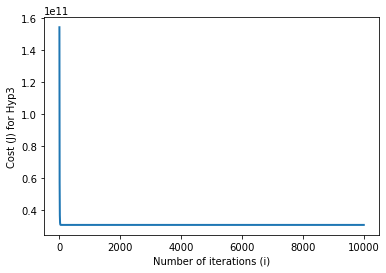

In [67]:
α_hyp3 = 0.1
iterations_hyp3 = 10000
theta_hyp3 = np.zeros(7)

theta_hyp3, J_history_hyp3 = gradientDescentMulti(X_train_norm_hyp3, Y_train, theta_hyp3, α_hyp3, iterations_hyp3)

pyplot.plot(np.arange(len(J_history_hyp3)), J_history_hyp3, lw=2)
pyplot.xlabel('Number of iterations (i)')
pyplot.ylabel('Cost (J) for Hyp3')

print(str(theta_hyp3))

In [68]:
i = 1
α_Fold = 0.1
Iterations_Fold = 10000
theta_Fold = np.zeros(13)
kfold = KFold(3)

for train, test in kfold.split(X):
    
    X_train_Fold = X[train]
    Y_train_Fold = Y[train]
    Y_train_Fold_size = Y_train_Fold.size
    
    X_test_Fold = X[test]
    Y_test_Fold = Y[test]
    Y_test_Fold_size = Y_test_Fold.size
    
    X_train_Fold_norm, mu_Fold, sigma_Fold = featureNormalize(X_train_Fold)
    X_test_Fold_norm = (X_test_Fold - mu_Fold)/(sigma_Fold)
    
    X_train_Fold_norm = np.concatenate([np.ones((Y_train_Fold_size,1)), X_train_Fold_norm], axis = 1 )
    X_test_Fold_norm =  np.concatenate([np.ones((Y_test_Fold_size,1)), X_test_Fold_norm],  axis = 1 )
    
    theta_Fold, J_history_Fold = gradientDescentMulti(X_train_Fold_norm, Y_train_Fold, theta_Fold, α_Fold, Iterations_Fold)
    
    print('Fold No. = ',i)
    
    i = i + 1


Fold No. =  1
Fold No. =  2
Fold No. =  3
